https://realpython.com/python-keras-text-classification/#choosing-a-data-set

https://ruder.io/text-classification-tensorflow-estimators/
https://github.com/eisenjulian/nlp_estimator_tutorial/blob/master/nlp_estimators.ipynb

In [1]:
import pandas as pd

filepath_dict = {'yelp':   'C:/Personal/Portfolio/text classification keras/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': 'C:/Personal/Portfolio/text classification keras/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   'C:/Personal/Portfolio/text classification keras/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


# Bag of Words

In [2]:

#vectorize sentences: it takes a sentence and create a 'vocabulary" of unique words in the list
#let's say we have this sentence
sentence = ''
from sklearn.feature_extraction.text import CountVectorizer

sentences = ['John likes ice cream', 'John hates chocolate.']

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
#we create a vocabulary. It tells us every unique words in the sentences and gives them an index number
print(vectorizer.vocabulary_)

#here we can see if the sentence has the word 
vectorizer.transform(sentences).toarray()

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}


array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

# Baseline Model

In [3]:
#split into train and test

from sklearn.model_selection import train_test_split

df_yelp = df[df['source']=='yelp']

#get a numpy array of values
sentences=df_yelp['sentence'].values
y=df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [4]:
#create feature vector

from sklearn.feature_extraction.text import CountVectorizer


vectorizer =CountVectorizer() #performs tokenization that seperates the sentences into a set of tokens. It also removes
#punctuations and special characters.
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test=vectorizer.transform(sentences_test)

X_train

#750*1714 sparse matrix
#750 stands for 750 samples
#each sample has 1714 dimensions, which is the size of the vocabulary
#

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

# Logistic Regression 

In [5]:
#logistic regression on yelp data

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


C:\Users\yvonn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
#logistic model on other data
for source in df['source'].unique():
    df_source =df[df['source'] == source]
    sentences =df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test=train_test_split(sentences, y, test_size=0.25, random_state=1000)
    
    vectorizer=CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train=vectorizer.transform(sentences_train)
    X_test=vectorizer.transform(sentences_test)
    
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    score=classifier.score(X_test,y_test)
    print('Accuracy for {} data : {:.4f}'.format(source,score))

Accuracy for yelp data : 0.7960
Accuracy for amazon data : 0.7960
Accuracy for imdb data : 0.7487


C:\Users\yvonn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yvonn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yvonn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# ANN 

In [7]:
from keras.models import Sequential
from keras import layers

input_dim=X_train.shape[1] #number of features

model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


Using TensorFlow backend.


In [8]:
#then we use the .compile() method to configure the process and to specify the optimizer and the loss function

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [9]:
#fit

history = model.fit(X_train, y_train, 
                   epochs=100,
                   verbose=False,
                   validation_data=(X_test, y_test),
                   batch_size=10)

In [10]:
#evaluate()
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

#the model is overfitting. Mayb be too many epochs for the size of the dataset
#testing performance is larger than logistics


Training Accuracy: 1.0000
Testing Accuracy: 0.7807


In [11]:
#plot training and test loss 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


#when validation loss starts to rise, it means the model is starting to overfit. Epochs around 20-40 is a good point ot stop/ 


# word embedding

In [12]:
#tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000) #num_words is used to set the size of the vocabulary. Only the most common num of words will be kept

tokenizer.fit_on_texts(sentences_train)

X_train=tokenizer.texts_to_sequences(sentences_train)
X_test=tokenizer.texts_to_sequences(sentences_test)

vocab_size=len(tokenizer.word_index)+1 #adding 1 to reserced index 0 for padding
print(sentences_train[2])
print(X_train[2])

#the index is ordered based on frequency

I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [13]:
#take a look of index of these words

for word in ['the', 'all']:
    print ('{}:{}'.format(word,tokenizer.word_index[word]))
    

the:1
all:27


In [14]:
#pad sequence: every vector has differnt length, so we append empty space with 0
from keras.preprocessing.sequence import pad_sequences

maxlen=100

X_train=pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

print(X_train[0,:])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


Keras Embedding Layers

In [15]:
from keras.models import Sequential
from keras import layers

embedding_dim=50

model=Sequential()
#the embedding layer will take the calcualted integers and map them to a dense vector of the embeding.
#it's for keras to learn a new embedding space 

model.add(layers.Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 1.0000
Testing Accuracy: 0.6738


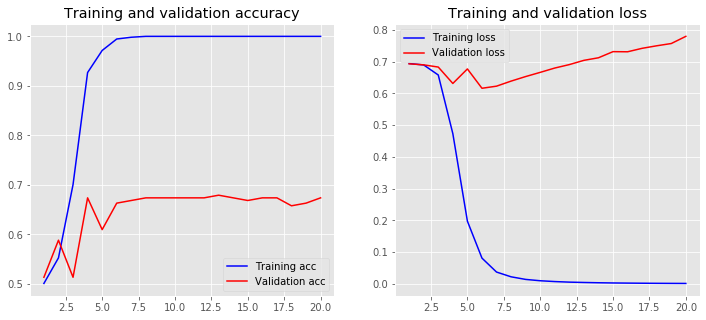

In [16]:
#the weights of the embedding layer are initialize with random weights and are then adjusted through backpropagation during trianing
history= model.fit(X_train,y_train,
                  epochs=20,
                  verbose=False,
                  validation_data=(X_test,y_test),
                  batch_size=10)
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

plot_history(history)

In [17]:
#anohter model - add the pooling layers
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7968


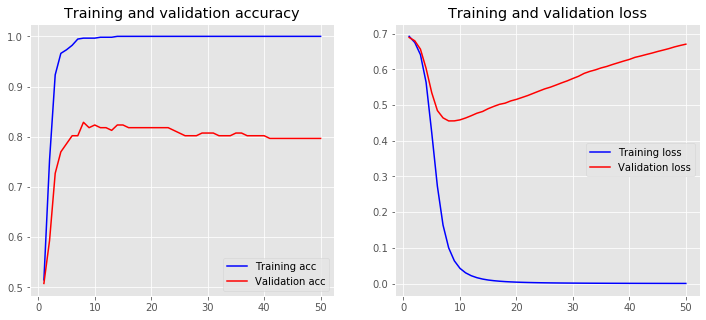

In [18]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Pretrained word embeddings

# CNN

In [19]:
embedding_dim=100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Conv1D(128,5,activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          257500    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 322,929
Trainable params: 322,929
Non-trainable params: 0
_________________________________________________________________


C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 1.0000
Testing Accuracy:  0.7540


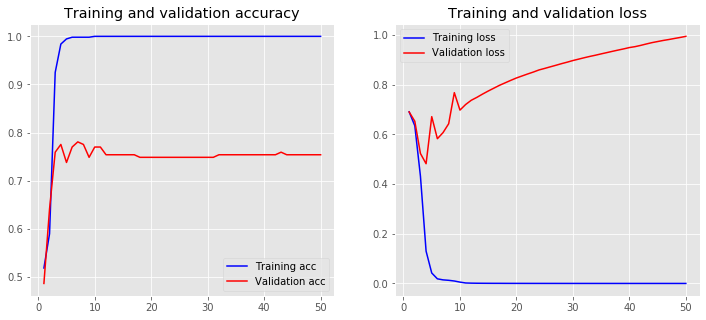

In [20]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Hyperparameters Optimization

#### random Search

In [21]:
#create a function for model that various hyperparameters can be set
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [22]:
#create a  dictionary

param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [23]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

#main settings
epochs=20
embedding_dim=50
maxlen=100
output_file='data/output.txt'

#run grid search for each source (yelp,amazon,imdb)
for source, frame in df.groupby('source'):
    print('running grid search for data set: ',source)
    sentences=df['sentence'].values
    y=df['label'].values
    
    #train-test split
    sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.25,random_state=1000)
    
    #tokenize words
    tokenizer=Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train=tokenizer.texts_to_sequences(sentences_train)
    X_test=tokenizer.texts_to_sequences(sentences_test)
    
    #adding 1 because of reserved 0 index
    
    vocab_size=len(tokenizer.word_index)+1
    
    
    #pad sequences with zeros
    
    X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
    X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)
    
    #parameter grid for grid search
    
    
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    
    model=KerasClassifier(build_fn=create_model,
                         epochs=epochs,batch_size=10,
                         verbose=False)
    grid=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=4,verbose=1,n_iter=5)
    grid_result=grid.fit(X_train,y_train)
    
    #evaluate testing set
    test_accuracy=grid.score(X_test,y_test)
    
    s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
    print(output_string)
    
    


running grid search for data set:  amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\si

Running amazon data set
Best Accuracy : 0.8190
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8355


running grid search for data set:  imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\si

Running imdb data set
Best Accuracy : 0.8205
{'vocab_size': 4603, 'num_filters': 64, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy : 0.8297


running grid search for data set:  yelp
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\yvonn\Anaconda3\lib\si

Running yelp data set
Best Accuracy : 0.8151
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8341


